### Preprocessing

In [1]:
import numpy as np
import pandas as pd
import glob
import os
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
#from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.decomposition import LatentDirichletAllocation as lda
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

%run '/Users/Hugo/Documents/Github/HOTT_NLP_ENSAE/data.py'
%run '/Users/Hugo/Documents/Github/HOTT_NLP_ENSAE/distances.py'
%run '/Users/Hugo/Documents/Github/HOTT_NLP_ENSAE/hott.py'
%run '/Users/Hugo/Documents/Github/HOTT_NLP_ENSAE/knn_classifier.py'

#### On load le dataframe sur lequel on travaille (ici on prend un tout petit subsample)

In [3]:
data_dir = '/Users/Hugo/Documents/Cours/ENSAE/3A/S2/NLP/Projet/data/nyt-comments'
#embed_path_300 = '/Users/Hugo/Documents/Cours/ENSAE/3A/S2/NLP/Projet/data/glove.6B/glove.6B.300d.txt'
embed_path_50 = '/Users/Hugo/Documents/Cours/ENSAE/3A/S2/NLP/Projet/data/glove.6B/glove.6B.50d.txt'
df_ = pd.read_csv(glob.glob(data_dir+'/Comments*.csv')[0], encoding = 'latin1')
df_ = df_.sample(frac=1).reset_index(drop=True)
#cols = df_.columns
df_test = df_[0:1000].reset_index(drop = True)
#del df_

In [ ]:
data = load_data(df_test, embed_path_50, stemming = True, K = 30, p = 1, n_word_keep = 20)

The vocabulary has been reduced from 9128 words to 2327 words. This represents a reduction of 25.49 percent


#### Revoir la fonction qui enlève les stops words car elle ne semble pas fonctionner : pourrait expliquer les mauvaises perf

In [4]:
bow_train, bow_test, topic_train, topic_test, y_train, y_test = train_test_split(data['X'],
                                                                                 data['proportions'],
                                                                                 data['y'],
                                                                                 random_state= 0)

In [5]:
C = data['cost_T']
n_classes = len(np.unique(y_train))

In [12]:
C

array([[0.        , 4.64048581, 5.24807162, ..., 4.86619727, 5.41143011,
        4.91830491],
       [4.64048581, 0.        , 4.5961142 , ..., 5.00382102, 5.67795103,
        4.97617726],
       [5.24807162, 4.5961142 , 0.        , ..., 4.55896923, 5.48743786,
        5.17462195],
       ...,
       [4.86619727, 5.00382102, 4.55896923, ..., 0.        , 5.43669781,
        4.96667617],
       [5.41143011, 5.67795103, 5.48743786, ..., 5.43669781, 0.        ,
        5.61467427],
       [4.91830491, 4.97617726, 5.17462195, ..., 4.96667617, 5.61467427,
        0.        ]])

In [22]:
# We could test with wmd and other distances in the file distances.py, however, the computational time may limit us
for neigh in {13,18} :
    hott_test_error, hott_pred = knn(topic_train, topic_test, y_train, y_test, hott, C, n_neighbors=neigh)
    print('Pour un un nombre de voisin égal à %s l\'erreur sur la base de test est de l\'ordre de %s'%(neigh,hott_test_error))

Pour un un nombre de voisin égal à 18 l'erreur sur la base de test est de l'ordre de 0.772
Pour un un nombre de voisin égal à 13 l'erreur sur la base de test est de l'ordre de 0.764


In [6]:
def cust_hott(p,q):
    
    return hott(p, q, C, threshold=None)

In [59]:
D = {}

for id1,doc1 in enumerate(topic_test):
    D[id1] = {}
    for id2,doc2 in enumerate(topic_test):
        D[id1][id2] = hott(doc1, doc2, C, threshold=None)
        
hott_mat = pd.DataFrame.from_dict(D)

In [80]:
len(topic_test)

250

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [10]:
from sklearn.manifold import TSNE 


Xtsne = TSNE(n_components=3, metric = cust_hott).fit_transform(topic_test)

indice1 = []
indice2 = []
indice3 = []
indice4 = []
indice5 = []

for i in range(len(y_test)):
    
    if y_test[i] == 1 :
        indice1.append(i) 

    if y_test[i] == 2:
        indice2.append(i) 


    if y_test[i] == 3 :
        indice3.append(i) 


    if y_test[i] == 4 :
        indice4.append(i) 

    if y_test[i] == 5 :
        indice5.append(i) 

Xtsne1 = Xtsne[indice1]
Xtsne2 = Xtsne[indice2]
Xtsne3 = Xtsne[indice3]
Xtsne4 = Xtsne[indice4]
Xtsne5 = Xtsne[indice5]

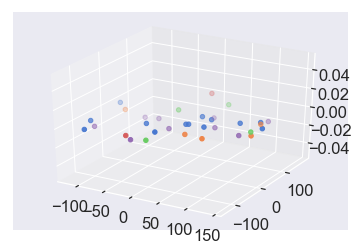

In [11]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


ax.scatter(Xtsne1[:,0],Xtsne1[:,1])
ax.scatter(Xtsne2[:,0],Xtsne2[:,1])
ax.scatter(Xtsne3[:,0],Xtsne3[:,1])
ax.scatter(Xtsne4[:,0],Xtsne4[:,1])
ax.scatter(Xtsne5[:,0],Xtsne5[:,1])